Импортируем библиотеки

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVR


Импортируем данные 

In [2]:
train_df = pd.read_excel("data/train.xlsx")
test_df = pd.read_excel("data/test.xlsx")

Первичный анализ данных

,Unnamed: 0,предмет,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,...,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories,mean_price
0,0,matematika,Репетитор по математике Емельянова Марина Вла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",...,Университетский преподаватель,31 год,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667
1,1,matematika,Репетитор по математике Назарова Анастасия Ан...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",...,Школьный преподаватель,8 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",11.666667
2,2,informatika,Репетитор по информатике Мотроненко Инна Конст...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Выезд за город: Балашиха-1, Балашиха-2...",Московская Школа (учитель ...,Московский городской педагогический университет,"Год окончания: 2008, Факультет: Математически...",...,Школьный преподаватель,11 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",23.333333
3,3,matematika,Репетитор по математике Логинова Елизавета Ал...,"['Школьная программа', 'Математический анализ'...",4.0,19,"Здравствуйте! Меня зовут Елизавета, о...",NaN,Санкт-Петербургский государственный университет,"Год окончания: 2021, Факультет: физический фа...",...,Частный преподаватель,5 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 1 по 4 класс', 'Школьники с 5 по...",0.116667
4,4,matematika,Репетитор по математике Харланов Олег Викторо...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Целеустремленный, ориентирован на резу...",преподавателем ...,Приазовский государственный технический униве...,"Год окончания: 2005, Факультет: Энергетически...",...,Частный преподаватель,19 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667


,Unnamed: 0,предмет,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,...,Ученое звание 1,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories
0,0,matematika,Репетитор по математике Тихонова Наталья Бори...,"['Школьная программа', 'Подготовка к ЕГЭ', 'Ан...",4,13,Дистанционное убучение по Skype с прим...,NaN,Петрозаводский государственный университет,"Год окончания: 1981, Факультет: физико-матема...",...,NaN,Частный преподаватель,26 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."
1,1,matematika,Репетитор по математике Худайбердина Милана Р...,"['Школьная программа', 'Математический анализ'...",0,0,Буду рада помочь в освоении дисциплин ...,NaN,"Национальный исследовательский университет ""В...","Год окончания: 2022, Факультет: Московский ин...",...,NaN,Студент,4 года,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."
2,2,matematika,Репетитор по математике Епихина Елена Вячесла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0,0,Преподаватель высшей квалификационный ...,Репетитор не предоставил информаци...,"Тамбовский ордена ""Знак Почёта"" государственн...","Год окончания: 1987, Факультет: Математика, С...",...,NaN,"Университетский преподаватель, Школьный препо...",36 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 10 по 11 класс, студенты колледж..."
3,3,matematika,Репетитор по математике Касаткин Денис Евгень...,"['Школьная программа', 'Подготовка к ОГЭ', 'Hi...",4,11,"Объясняю ровно столько, сколько надо. ...",NaN,Тюменский государственный университет,"Год окончания: 2022, Факультет: факультет меж...",...,NaN,Студент,3 года,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 1 по 4 класс', 'Школьники с 5 по..."
4,4,informatika,Репетитор по информатике Логвинов Артём Алекса...,['Подготовка к ЕГЭ'],0,0,"Подготовлю к ЕГЭ, уроки через любую уд...",Репетитор не предоставил информаци...,РТУ МИРЭА,"Год окончания: 2026, Факультет: Программная и...",...,NaN,Студент,1 год,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 10 по 11 класс, студенты колледж..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4548 non-null   int64  
 1   предмет           4548 non-null   object 
 2   ФИО               4548 non-null   object 
 3   tutor_head_tags   4548 non-null   object 
 4   tutor_rating      3959 non-null   float64
 5   tutor_reviews     4548 non-null   int64  
 6   description       4547 non-null   object 
 7   experience_desc   2171 non-null   object 
 8   Education_1       4548 non-null   object 
 9   Desc_Education_1  4472 non-null   object 
 10  Education_2       781 non-null    object 
 11  Desc_Education_2  777 non-null    object 
 12  Education_3       106 non-null    object 
 13  Desc_Education_3  105 non-null    object 
 14  Education_4       16 non-null     object 
 15  Desc_Education_4  16 non-null     object 
 16  Ученая степень 1  76 non-null     object 


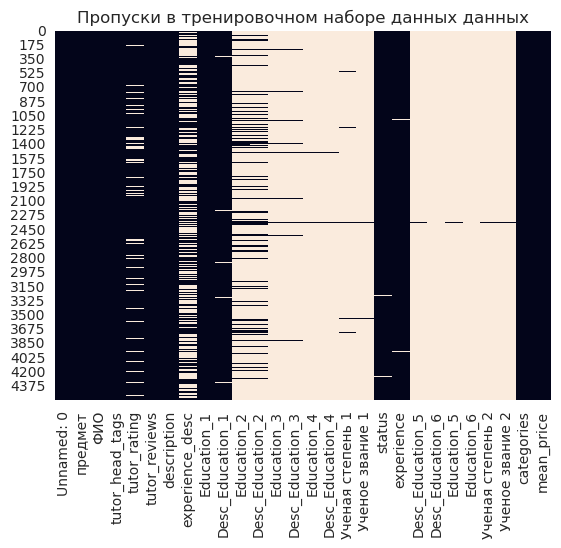

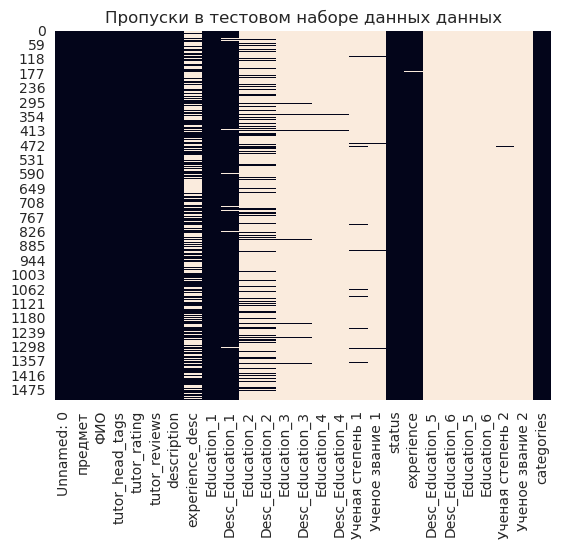

In [3]:
display(train_df.head())
display(test_df.head())
train_df.info()
test_df.info()
sns.heatmap(train_df.isna(), cbar=False)
plt.title('Пропуски в тренировочном наборе данных данных')
plt.show()

sns.heatmap(test_df.isna(), cbar=False)
plt.title('Пропуски в тестовом наборе данных данных')
plt.show()

Посмотрим распределение целевой переменной

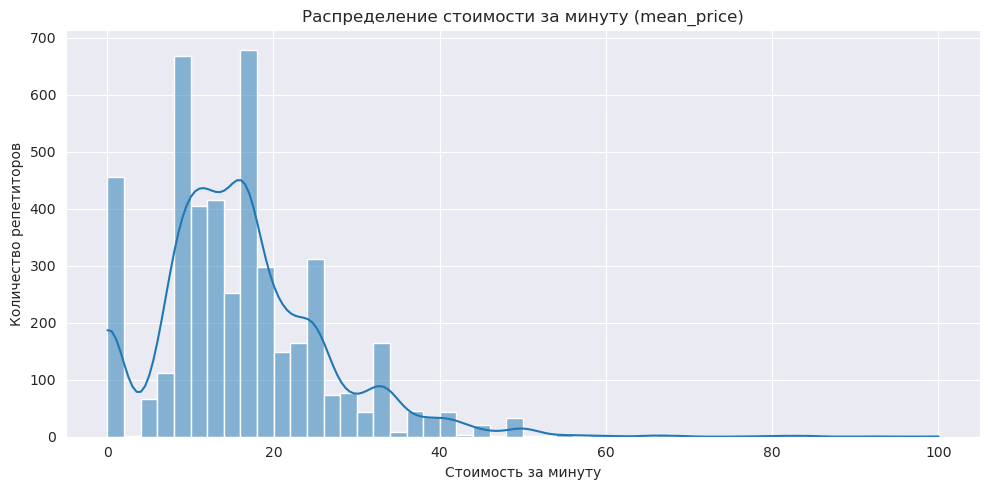

In [4]:
plt.figure(figsize=(10, 5))
sns.histplot(train_df['mean_price'], kde=True, bins=50)
plt.title('Распределение стоимости за минуту (mean_price)')
plt.xlabel('Стоимость за минуту')
plt.ylabel('Количество репетиторов')
plt.grid(True)
plt.tight_layout()
plt.show()

Построим расширенную корреляционную матрицу с учетом категорий 

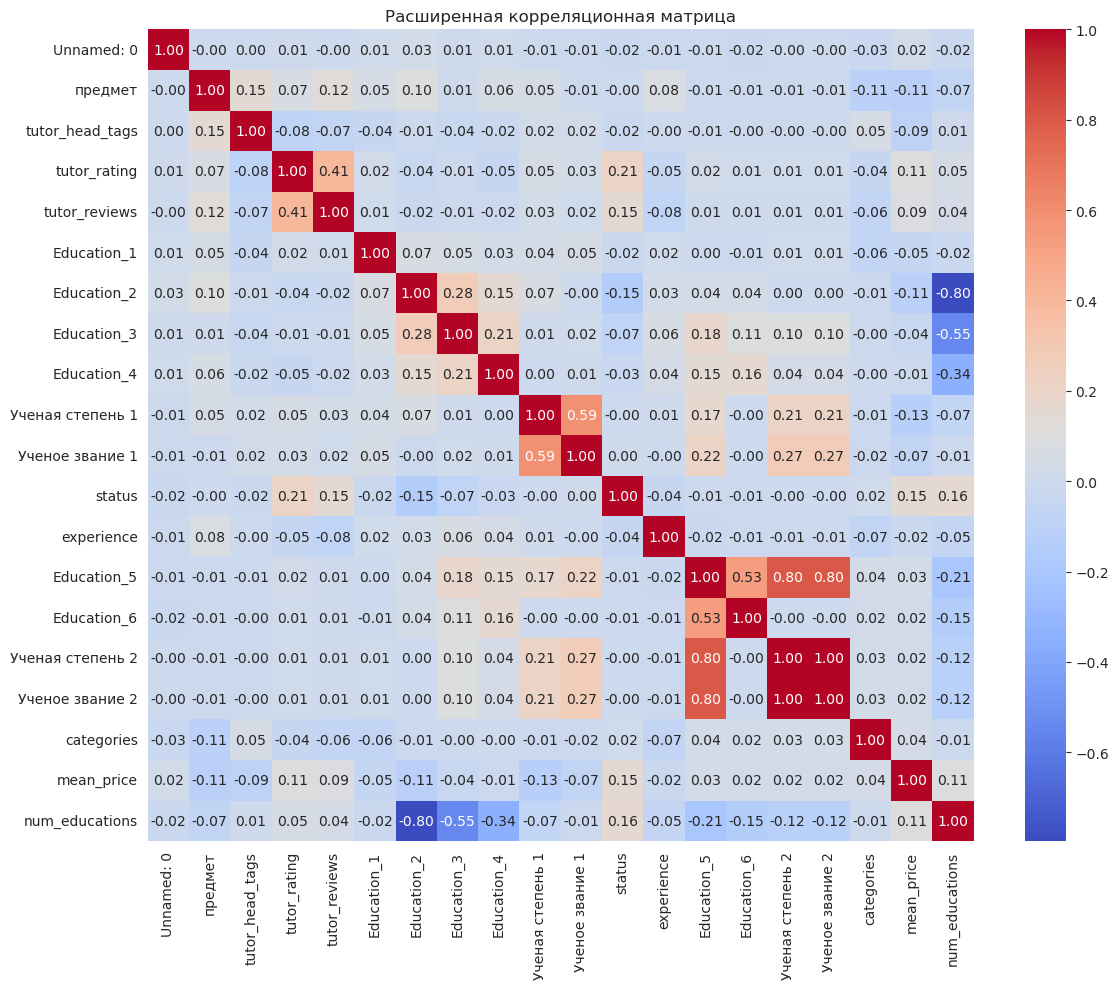

Расширенная корреляция с целевой переменной (mean_price):
mean_price          1.000000
status              0.147491
tutor_rating        0.113299
num_educations      0.106627
tutor_reviews       0.086597
categories          0.042253
Education_5         0.030037
Education_6         0.022727
Ученое звание 2     0.022526
Ученая степень 2    0.022526
Unnamed: 0          0.021842
Education_4        -0.013797
experience         -0.022134
Education_3        -0.037151
Education_1        -0.045855
Ученое звание 1    -0.070159
tutor_head_tags    -0.089657
Education_2        -0.109950
предмет            -0.110884
Ученая степень 1   -0.127778
Name: mean_price, dtype: float64


In [5]:
df_features = train_df.copy()
drop_cols = ['ФИО', 'description', 'experience_desc'] + [col for col in df_features.columns if 'Desc_Education' in col]
df_features.drop(columns=drop_cols, inplace=True, errors='ignore')
df_features['tutor_rating'] = df_features['tutor_rating'].fillna(df_features['tutor_rating'].median())
edu_cols = [col for col in df_features.columns if 'Education_' in col]
df_features['num_educations'] = df_features[edu_cols].notnull().sum(axis=1)

cat_cols = df_features.select_dtypes(include='object').columns
for col in cat_cols:
    df_features[col] = df_features[col].fillna("Unknown")
    le = LabelEncoder()
    df_features[col] = le.fit_transform(df_features[col])
corr_full = df_features.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_full, annot=True, fmt=".2f", cmap='coolwarm', square=False)
plt.title('Расширенная корреляционная матрица')
plt.tight_layout()
plt.show()
print("Расширенная корреляция с целевой переменной (mean_price):")
print(corr_full["mean_price"].sort_values(ascending=False))

Сделаем предобработку данных: удалим неинформативные колонки, удалим аномалии в целевой переменной и закодируем категориальные признаки 

In [6]:
df_train = train_df.copy()
df_test = test_df.copy()

df_train = df_train[df_train['mean_price'] >= 1.0].copy()


df_train['source'] = 'train'
df_test['source'] = 'test'
df_test['mean_price'] = np.nan 

full_df = pd.concat([df_train, df_test], ignore_index=True)

full_df['tutor_rating'] = full_df['tutor_rating'].fillna(full_df['tutor_rating'].median())
full_df['experience'] = full_df['experience'].fillna('0 лет')
full_df['experience'] = full_df['experience'].apply(lambda x: int(str(x).strip().split()[0]) if isinstance(x, str) else 0)

edu_cols = [col for col in full_df.columns if 'Education_' in col and 'Desc' not in col]
full_df['num_educations'] = full_df[edu_cols].notnull().sum(axis=1)

full_df['len_description'] = full_df['description'].fillna('').apply(len)
full_df['len_experience_desc'] = full_df['experience_desc'].fillna('').apply(len)
full_df['n_tags'] = full_df['tutor_head_tags'].apply(lambda x: len(eval(x)) if isinstance(x, str) and x.startswith("[") else 0)

full_df = pd.get_dummies(full_df, columns=['предмет', 'status'], drop_first=True)

drop_cols = [
    'ФИО', 'description', 'experience_desc', 'categories', 'tutor_head_tags',
    'Ученая степень 1', 'Ученая степень 2', 'Ученое звание 1', 'Ученое звание 2'
] + [col for col in full_df.columns if 'Desc_Education' in col] + \
    [col for col in full_df.columns if 'Education_' in col]
full_df.drop(columns=drop_cols, inplace=True, errors='ignore')

df_train_final = full_df[full_df['source'] == 'train'].drop(columns=['source'])
df_test_final = full_df[full_df['source'] == 'test'].drop(columns=['source', 'mean_price'])

X = df_train_final.drop(columns='mean_price')
y = df_train_final['mean_price']
X_test = df_test_final

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

Сделаем подбор параметров и обучим модель SVR

In [7]:
param_grid = {
    'C': [1, 10, 30],
    'epsilon': [0.01, 0.1],
    'kernel': ['rbf']
}

svr = SVR()
grid = GridSearchCV(svr, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid.fit(X_scaled, y)

print("Лучшие параметры:", grid.best_params_)
print("Средняя MSE (CV):", -grid.best_score_)


Лучшие параметры: {'C': 30, 'epsilon': 0.1, 'kernel': 'rbf'}
Средняя MSE (CV): 62.647243678041704


Прогон на тесте и submission

In [8]:
y_pred = grid.best_estimator_.predict(X_test_scaled)

submission = pd.DataFrame({
    'index': range(len(df_test)),
    'mean_price': y_pred
})

submission.to_csv("submission.csv", index=False)

Скриншот с Kaggle

![](img_1.png)